In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import nltk 

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lukes\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [46]:
DATA_DIR = 'E:\\CS224S_final_Project\\data\\raw_data'

In [47]:
train_data = "{}\\..\\train_split_Depression_AVEC2017.csv".format(DATA_DIR)
train_df = pd.read_csv(train_data, header=0)

In [48]:
dev_data = "{}\\..\\dev_split_Depression_AVEC2017.csv".format(DATA_DIR)
dev_df = pd.read_csv(dev_data, header=0)

In [49]:
# Number of depressed and not depressed

def num_for_classes(df):
    num_not_depressed = len(df[df.PHQ8_Binary == 0]) - 1
    num_depressed = len(df[df.PHQ8_Binary == 1]) - 1
    return num_not_depressed, num_depressed

In [73]:
# Time length, number of words, and number of unique words spoken by participant

def info_per_session(df):
    num_words_per_session = []
    num_unique_words_per_session = []
    length_time_participant_per_session = []
    participants = []

    for _, df_row in df.iterrows():
        p_num = int(df_row['Participant_ID'])
        participants.append("Participant" + str(p_num))
        transcript_path = "{}\\{}_P\\{}_TRANSCRIPT.csv".format(DATA_DIR, p_num, p_num)
        transcript_df = pd.read_csv(transcript_path, delimiter='\t', header=0)
        transcript_df = transcript_df[transcript_df.speaker != "Ellie"]

        length_time_participant = np.sum(np.array(transcript_df['stop_time']) - np.array(transcript_df['start_time']))

        num_words = 0
        unique_words = set()
        
        for index, row in transcript_df.iterrows():
            try:
                trascript = row['value']
                trascript = re.sub('<.*>', '', trascript)
                words = nltk.word_tokenize(trascript)
                num_words += len(words)
                unique_words = unique_words | set(words)
            except:
                continue

        num_words_per_session.append(num_words)
        num_unique_words_per_session.append(len(unique_words))
        length_time_participant_per_session.append(length_time_participant)
       
    return num_words_per_session, num_unique_words_per_session, length_time_participant_per_session, participants

NameError: name 'transcript_df' is not defined

In [71]:
# Number of Samples from each session

def num_samples_per_session(df):
    num_samples_per_session = []
    for _, df_row in df.iterrows():
        p_num = int(df_row['Participant_ID'])
        df = pd.read_pickle(DATA_DIR + "\\..\\dev_data\\" + str(p_num) +'.pkl')
        num_samples_per_session.append(len(df) - 1)
        
    return num_samples_per_session

In [52]:
IMAGES_DIR = 'E:\\CS224S_final_Project\\data\\images'

[2081, 1037, 3506, 1126, 1252, 774, 1397, 634, 651, 718, 713, 826, 960, 1572, 922, 1890, 522, 811, 2078, 480, 1367, 985, 882, 1050, 616, 1279, 749, 2006, 1510, 482, 1024, 1474, 1136, 1745, 1289, 1061, 1604, 408, 677, 634, 839, 2235, 4289, 2544, 3618, 2349, 3085, 838, 2225, 2281, 556, 1806, 2583, 3953, 2163, 183, 2230, 609, 718, 761, 1738, 1183, 1234, 1172, 2459, 899, 1499, 1248, 1474, 1694, 1041, 1771, 1245, 1092, 982, 1190, 1452, 946, 2683, 1198, 979, 518, 2902, 1049, 1811, 1424, 2547, 3191, 694, 1105, 1645, 1392, 1260, 937, 2100, 1949, 1523, 351, 1775, 719, 1308, 673, 731, 792, 1860, 1467, 1252] [453, 342, 615, 330, 349, 283, 345, 250, 234, 277, 255, 252, 311, 395, 279, 500, 210, 288, 517, 211, 405, 301, 300, 341, 224, 373, 238, 406, 340, 191, 334, 428, 313, 451, 382, 378, 453, 172, 288, 235, 301, 528, 804, 554, 539, 420, 611, 296, 498, 541, 242, 479, 491, 719, 555, 77, 532, 246, 253, 224, 445, 424, 344, 362, 497, 281, 442, 371, 407, 440, 379, 454, 372, 300, 302, 377, 410, 342, 596, 

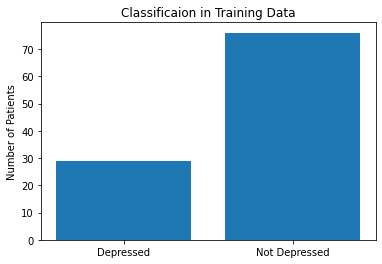

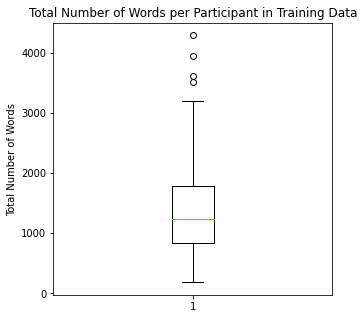

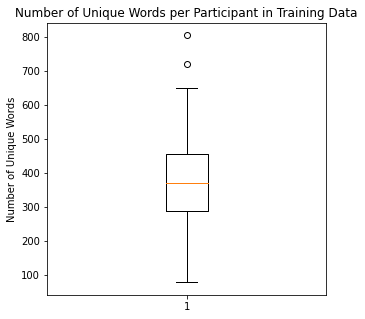

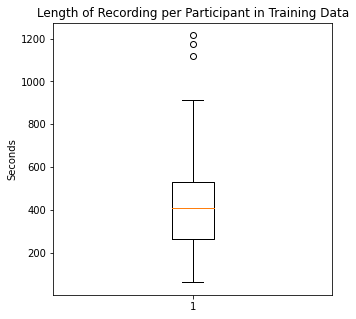

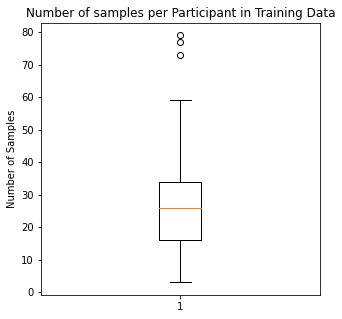

In [70]:
# Training Dataset Info
training_num_not_depressed, training_num_depressed = num_for_classes(train_df)
training_num_words_per_session, training_num_unique_words_per_session, training_length_time_participant_per_session, training_participants = info_per_session(train_df)
training_num_samples_per_session = num_samples_per_session(train_df)

plt.figure(1)
plt.title('Classificaion in Training Data')
plt.ylabel('Number of Patients')
plt.bar(['Depressed', 'Not Depressed'], [training_num_depressed, training_num_not_depressed])
plt.savefig(IMAGES_DIR + '/classification_training.png')

plt.figure(2, figsize = (5,5))
plt.title('Total Number of Words per Participant in Training Data')
plt.ylabel('Total Number of Words')

plt.boxplot(training_num_words_per_session)
plt.savefig(IMAGES_DIR + '/num_words_training.png')

plt.figure(3, figsize = (5,5))
plt.title('Number of Unique Words per Participant in Training Data')
plt.ylabel('Number of Unique Words')
plt.boxplot(training_num_unique_words_per_session)
print(training_num_unique_words_per_session)
plt.savefig(IMAGES_DIR + '/num_unique_words_training.png')

plt.figure(4, figsize = (5,5))
plt.title('Length of Recording per Participant in Training Data')
plt.ylabel('Seconds')
plt.boxplot(training_length_time_participant_per_session)
plt.savefig(IMAGES_DIR + '/time_length_training.png')

plt.figure(5, figsize = (5,5))
plt.title('Number of samples per Participant in Training Data')
plt.ylabel('Number of Samples')
plt.boxplot(training_num_samples_per_session)
plt.savefig(IMAGES_DIR + '/num_samples_training.png')

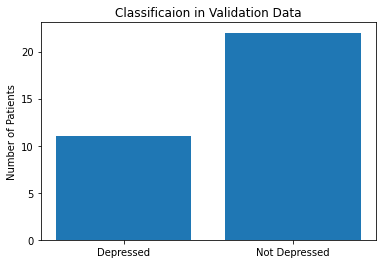

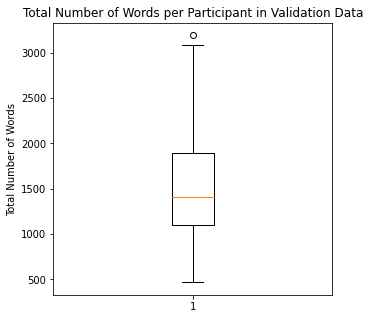

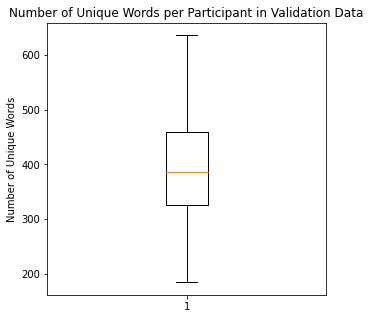

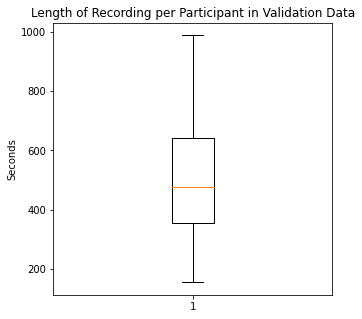

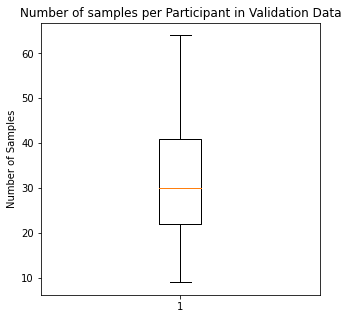

In [74]:
# Dev Dataset Info
dev_num_not_depressed, dev_num_depressed = num_for_classes(dev_df)
dev_num_words_per_session, dev_num_unique_words_per_session, dev_length_time_participant_per_session, dev_participants = info_per_session(dev_df)
dev_num_samples_per_session = num_samples_per_session(dev_df)

plt.figure(6)
plt.title('Classificaion in Validation Data')
plt.ylabel('Number of Patients')
plt.bar(['Depressed', 'Not Depressed'], [dev_num_depressed, dev_num_not_depressed])
plt.savefig(IMAGES_DIR + '/classification_validation.png')

plt.figure(7, figsize = (5,5))
plt.title('Total Number of Words per Participant in Validation Data')
plt.ylabel('Total Number of Words')
plt.boxplot(dev_num_words_per_session)
plt.savefig(IMAGES_DIR + '/num_words_validation.png')

plt.figure(8, figsize = (5,5))
plt.title('Number of Unique Words per Participant in Validation Data')
plt.ylabel('Number of Unique Words')
plt.boxplot(dev_num_unique_words_per_session)
plt.savefig(IMAGES_DIR + '/num_unique_words_validation.png')

plt.figure(9, figsize = (5,5))
plt.title('Length of Recording per Participant in Validation Data')
plt.ylabel('Seconds')
plt.boxplot(dev_length_time_participant_per_session)
plt.savefig(IMAGES_DIR + '/time_length_validation.png')

plt.figure(10, figsize = (5,5))
plt.title('Number of samples per Participant in Validation Data')
plt.ylabel('Number of Samples')
plt.boxplot(dev_num_samples_per_session)
plt.savefig(IMAGES_DIR + '/num_samples_validation.png')